In [1]:
# %pip install openpyxl
# %pip install --upgrade openpyxl
# %pip install plotly
# %pip install matplotlib
# %pip install nbformat
# %pip install dash

%load_ext autoreload
%autoreload 2

# sys.path.insert(1, '../')

In [2]:
import pandas as pd

from datetime import date
#from typing import int, float, str

C:\Users\tyewf\AppData\Local\Temp\ipykernel_23676\2956845767.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from pd_data_frame_checks import convert_columns_by_type
from pd_data_frame_checks import convert_columns_dict_type_allocation
from pd_data_frame_checks import check_columns_existence

from rba_monthly_adi_statistics import main
from process_specific_bank.process_specific_bank import specific_bank_calculations

from utils import read_yaml

In [4]:
result = main(
        file_name = 'data/Monthly authorised deposit-taking institution statistics back-series March 2019 - December 2023.xlsx',
        sheet_name = 'Table 1',
        skiprows = 1,
        specific_bank_names_list = ['Macquarie Bank Limited'],
        processes_to_run = ['all'],
        date_column = 'Period',
)

hi


# Run using shell

In [13]:
!python rba_monthly_adi_statistics.py

hi


c:\Users\tyewf\github_projects\rba_monthly_adi_statistics\rba_monthly_adi_statistics.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Run individual scripts

In [5]:
import logging
logger = logging.getLogger(__name__)

In [6]:
# Arguments
file_name: str = 'data/Monthly authorised deposit-taking institution statistics back-series March 2019 - December 2023.xlsx'
sheet_name: str = 'Table 1'
skiprows: int = 1
processes_to_run: list = ['all']
specific_bank_names_list: str = ['Macquarie Bank Limited']
date_column: str = 'Period'

In [7]:
# Needed to run to get initial data
from rba_monthly_adi_statistics import read_and_process_data

# Read config
config_dict = read_yaml(file_path = 'config.yaml')

# Read and process data
rba_monthly_stats_df = read_and_process_data(
    config_dict=config_dict,
    file_name=file_name,
    sheet_name=sheet_name,
    skiprows=skiprows,
    date_column=date_column,        
)

# Melt the DataFrame to convert from wide to long format
id_cols = ['Period', 'ABN', 'Institution Name']
narrow_rba_monthly_stats_df = pd.melt(rba_monthly_stats_df, id_vars=id_cols, var_name='Variable', value_name='Value')

# Aggregate Bank Statistics

In [8]:
import plotly.express as px

from aggregate_bank_statistics.aggregate_bank_stats import aggregate_bank_stats_fn

from utils_dataframe_calcs import filter_dataframe_by_values
from utils_dataframe_calcs import df_column_movements, df_column_movements_multiple

from utils_visualise_data import plot_column_graph_plotly

In [23]:
aggregate_bank_stats_df=aggregate_bank_stats_fn(narrow_rba_monthly_stats_df=narrow_rba_monthly_stats_df)

In [10]:
plot_column_graph_plotly(
    date_column=df['Period'],
    value_column=df['Entities - count'],
    title='Column Graph',
    xlabel='Date',
    ylabel='Value')

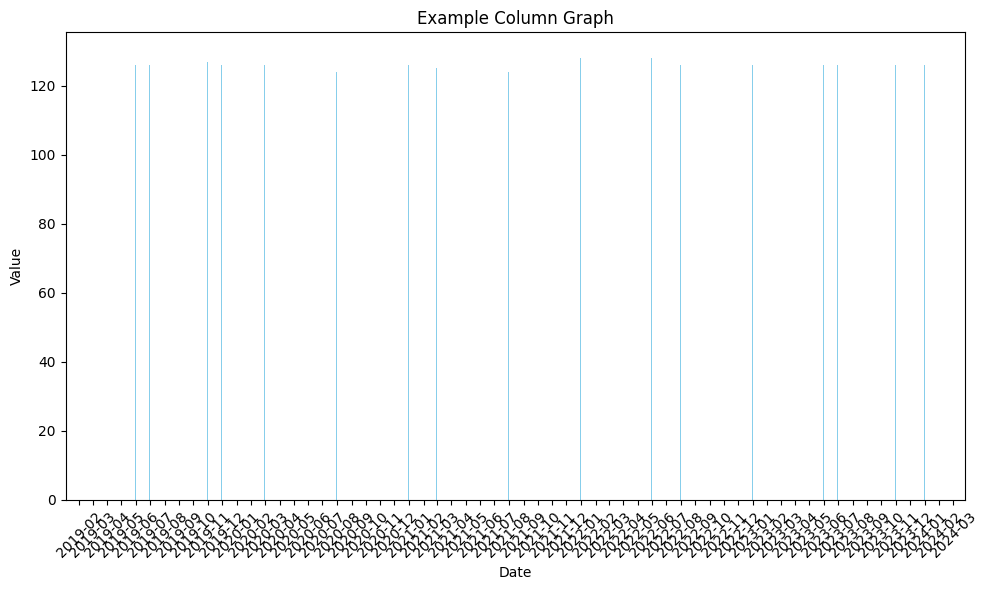

In [11]:
from utils_visualise_data import plot_column_graph

# Example usage:
# Replace date_series and value_series with your actual date and value columns
#date_series = pd.to_datetime(['2022-01-01', '2022-02-01', '2022-03-01'])
#value_series = [10, 15, 20]

plot_column_graph(
    date_column=df['Period'],
    value_column=df['Entities - count'],
    title='Example Column Graph',
    xlabel='Date',
    ylabel='Value')

In [12]:
mvmts=df_column_movements(
    df=df,
    column_name='Cash - Monthly totals',
    new_col_suffix='MoM Movement ($)'
)


In [21]:
# Install the required libraries if you haven't already
# pip install dash dash-bootstrap-components pandas plotly

import dash
# import dash_core_components as dcc # depricated
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px


# Sample data
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Interactive Dashboard"),
    
    dcc.Graph(id='line-plot'),
    
    dcc.RangeSlider(
        id='date-range-slider',
        marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df['Date'])},
        min=0,
        max=len(df['Date']) - 1,
        value=[0, len(df['Date']) - 1],
        step=1
    )
])

# Define callback to update the plot based on the date range slider
@app.callback(
    Output('line-plot', 'figure'),
    [Input('date-range-slider', 'value')]
)
def update_plot(selected_date_range):
    start_idx, end_idx = selected_date_range
    filtered_df = df.iloc[start_idx:end_idx + 1]
    
    fig = px.line(filtered_df, x='Date', y='Value', title='Filtered Line Plot')
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [14]:
# Install the required libraries if you haven't already
# pip install dash dash-bootstrap-components pandas plotly

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample data
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app with multiple sheets
app.layout = html.Div([
    html.H1("Interactive Dashboard"),
    
    dcc.Tabs([
        dcc.Tab(label='Line Plot', children=[
            dcc.Graph(id='line-plot'),
            dcc.RangeSlider(
                id='date-range-slider',
                marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df['Date'])},
                min=0,
                max=len(df['Date']) - 1,
                value=[0, len(df['Date']) - 1],
                step=1
            )
        ]),
        
        dcc.Tab(label='Bar Chart', children=[
            dcc.Graph(id='bar-chart'),
            # Add components specific to the second sheet
        ]),
        
        # Add more dcc.Tab components for additional sheets
        
    ])
])

# Define callbacks to update plots based on user interactions
@app.callback(
    Output('line-plot', 'figure'),
    [Input('date-range-slider', 'value')]
)
def update_line_plot(selected_date_range):
    start_idx, end_idx = selected_date_range
    filtered_df = df.iloc[start_idx:end_idx + 1]
    
    fig = px.line(filtered_df, x='Date', y='Value', title='Filtered Line Plot')
    
    return fig

# Add similar callbacks for other sheets

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [15]:
# Install the required libraries if you haven't already
# pip install dash dash-bootstrap-components pandas plotly

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample data
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app with multiple nested tabs
app.layout = html.Div([
    html.H1("Interactive Dashboard"),
    
    dcc.Tabs([
        dcc.Tab(label='Sheet 1', children=[
            dcc.Tabs([
                dcc.Tab(label='Line Plot', children=[
                    dcc.Graph(id='line-plot'),
                    dcc.RangeSlider(
                        id='date-range-slider',
                        marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df['Date'])},
                        min=0,
                        max=len(df['Date']) - 1,
                        value=[0, len(df['Date']) - 1],
                        step=1
                    )
                ]),
                
                dcc.Tab(label='Bar Chart', children=[
                    dcc.Graph(id='bar-chart'),
                    # Add components specific to the second level of tabs
                ]),
                
                # Add more dcc.Tab components for additional sheets within the first level of tabs
                
            ])
        ]),
        
        dcc.Tab(label='Sheet 2', children=[
            dcc.Tabs([
                dcc.Tab(label='Scatter Plot', children=[
                    dcc.Graph(id='scatter-plot'),
                    # Add components specific to the second level of tabs for Sheet 2
                ]),
                
                # Add more dcc.Tab components for additional sheets within the second level of tabs
                
            ])
        ]),
        
        # Add more dcc.Tab components for additional top-level sheets
        
    ])
])

# Define callbacks to update plots based on user interactions
@app.callback(
    Output('line-plot', 'figure'),
    [Input('date-range-slider', 'value')]
)
def update_line_plot(selected_date_range):
    start_idx, end_idx = selected_date_range
    filtered_df = df.iloc[start_idx:end_idx + 1]
    
    fig = px.line(filtered_df, x='Date', y='Value', title='Filtered Line Plot')
    
    return fig

# Add similar callbacks for other plots within the nested tabs

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import plotly.express as px

from aggregate_bank_statistics.aggregate_bank_stats import aggregate_bank_stats_fn

from utils_dataframe_calcs import filter_dataframe_by_values
from utils_dataframe_calcs import df_column_movements, df_column_movements_multiple

from utils_visualise_data import plot_column_graph_plotly

In [17]:
# Install the required libraries if you haven't already
# pip install dash dash-bootstrap-components pandas plotly

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample data
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app with a dropdown menu
app.layout = html.Div([
    html.H1("Interactive Dashboard"),

    # Dropdown menu for selecting the sheet
    dcc.Dropdown(
        id='sheet-dropdown',
        options=[
            {'label': 'Sheet 1', 'value': 'sheet1'},
            {'label': 'Sheet 2', 'value': 'sheet2'},
            # Add more options for additional sheets
        ],
        value='sheet1',  # Default value
    ),

    # Output container for displaying the selected sheet content
    html.Div(id='sheet-content')
])

# Define callbacks to update the sheet content based on the selected dropdown value
@app.callback(
    Output('sheet-content', 'children'),
    [Input('sheet-dropdown', 'value')]
)
def update_sheet_content(selected_sheet):
    if selected_sheet == 'sheet1':
        # Content for Sheet 1
        return [
            dcc.Graph(id='line-plot'),
            dcc.RangeSlider(
                id='date-range-slider',
                marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df['Date'])},
                min=0,
                max=len(df['Date']) - 1,
                value=[0, len(df['Date']) - 1],
                step=1
            )
        ]
    elif selected_sheet == 'sheet2':
        # Content for Sheet 2
        return [
            dcc.Graph(id='bar-chart'),
            # Add components specific to Sheet 2
        ]
    # Add more conditions for additional sheets

# Define callbacks to update plots based on user interactions
@app.callback(
    Output('line-plot', 'figure'),
    [Input('date-range-slider', 'value')]
)
def update_line_plot(selected_date_range):
    start_idx, end_idx = selected_date_range
    filtered_df = df.iloc[start_idx:end_idx + 1]
    
    fig = px.line(filtered_df, x='Date', y='Value', title='Filtered Line Plot')
    
    return fig

# Add similar callbacks for other plots within the sheets

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [18]:
# Install the required libraries if you haven't already
# pip install dash dash-bootstrap-components pandas plotly

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample data
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app with three levels of dropdowns
app.layout = html.Div([
    html.H1("Interactive Dashboard"),

    # First level dropdown for selecting the sheet
    dcc.Dropdown(
        id='sheet-dropdown',
        options=[
            {'label': 'Sheet 1', 'value': 'sheet1'},
            {'label': 'Sheet 2', 'value': 'sheet2'},
            # Add more options for additional sheets
        ],
        value='sheet1',  # Default value
    ),

    # Second level dropdown for selecting the category within the sheet
    dcc.Dropdown(id='category-dropdown'),

    # Output container for displaying the selected sheet content
    html.Div(id='sheet-content')
])

# Define callback to populate the second level dropdown based on the selected sheet
@app.callback(
    Output('category-dropdown', 'options'),
    [Input('sheet-dropdown', 'value')]
)
def update_category_dropdown(selected_sheet):
    if selected_sheet == 'sheet1':
        return [
            {'label': 'Category A', 'value': 'categoryA'},
            {'label': 'Category B', 'value': 'categoryB'},
            # Add more options for additional categories in Sheet 1
        ]
    elif selected_sheet == 'sheet2':
        return [
            {'label': 'Category X', 'value': 'categoryX'},
            {'label': 'Category Y', 'value': 'categoryY'},
            # Add more options for additional categories in Sheet 2
        ]
    # Add more conditions for additional sheets

# Define callback to update the sheet content based on the selected values
@app.callback(
    Output('sheet-content', 'children'),
    [Input('sheet-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_sheet_content(selected_sheet, selected_category):
    # Add conditions based on selected_sheet and selected_category to update the content
    if selected_sheet == 'sheet1' and selected_category == 'categoryA':
        # Content for Sheet 1, Category A
        return [
            dcc.Graph(id='line-plot'),
            # Add more components specific to Sheet 1, Category A
        ]
    elif selected_sheet == 'sheet1' and selected_category == 'categoryB':
        # Content for Sheet 1, Category B
        return [
            dcc.Graph(id='bar-chart'),
            # Add more components specific to Sheet 1, Category B
        ]
    elif selected_sheet == 'sheet2' and selected_category == 'categoryX':
        # Content for Sheet 2, Category X
        return [
            dcc.Graph(id='scatter-plot'),
            # Add more components specific to Sheet 2, Category X
        ]
    # Add more conditions for additional sheets and categories

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [19]:
# Install the required libraries if you haven't already
# pip install dash dash-html-components dash-core-components pandas plotly

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample data
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Interactive Dashboard"),
    dcc.Graph(id='line-plot'),
    dcc.RangeSlider(
        id='date-range-slider',
        marks={i: date.strftime('%Y-%m-%d') for i, date in enumerate(df['Date'])},
        min=0,
        max=len(df['Date']) - 1,
        value=[0, len(df['Date']) - 1],
        step=1
    )
])

# Define callback to update the plot based on the date range slider
@app.callback(
    Output('line-plot', 'figure'),
    [Input('date-range-slider', 'value')]
)
def update_line_plot(selected_date_range):
    start_idx, end_idx = selected_date_range
    filtered_df = df.iloc[start_idx:end_idx + 1]

    fig = px.line(filtered_df, x='Date', y='Value', title='Filtered Line Plot')

    return fig

# Save the app as a standalone HTML file
if __name__ == '__main__':
    app.run_server(debug=False, dev_tools_ui=False, dev_tools_props_check=False)
    app.to_html("dashboard.html")


AttributeError: 'Dash' object has no attribute 'to_html'

In [20]:
# Install the required libraries if you haven't already
# pip install dash dash-html-components dash-core-components pandas openpyxl

import dash
import dash_html_components as html
import dash_core_components as dcc
import pandas as pd

# Load data from Excel file
df = pd.read_excel('your_excel_file.xlsx')

# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Simple Dashboard"),
    
    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                {'x': df['Column1'], 'y': df['Column2'], 'type': 'scatter', 'mode': 'markers', 'name': 'Scatter Plot'}
            ],
            'layout': {
                'title': 'Scatter Plot'
            }
        }
    )
])

# Save the app as a standalone HTML file
with open('dashboard.html', 'w') as f:
    f.write(app.to_html())

print("Dashboard saved as 'dashboard.html'")


FileNotFoundError: [Errno 2] No such file or directory: 'your_excel_file.xlsx'

In [24]:
narrow_rba_monthly_stats_df
aggregate_bank_stats_df['Period']
aggregate_bank_stats_df['Cash - Monthly totals']
aggregate_bank_stats_df['Deposits by community service organisations']
aggregate_bank_stats_df['Deposits by financial institutions']
aggregate_bank_stats_df['Cash - Monthly totals - MoM Movement ($)']
aggregate_bank_stats_df['Deposits by financial institutions - MoM Movement ($)']

0    2019-03-31
1    2019-04-30
2    2019-05-31
3    2019-06-30
4    2019-07-31
5    2019-08-31
6    2019-09-30
7    2019-10-31
8    2019-11-30
9    2019-12-31
10   2020-01-31
11   2020-02-29
12   2020-03-31
13   2020-04-30
14   2020-05-31
15   2020-06-30
16   2020-07-31
17   2020-08-31
18   2020-09-30
19   2020-10-31
20   2020-11-30
21   2020-12-31
22   2021-01-31
23   2021-02-28
24   2021-03-31
25   2021-04-30
26   2021-05-31
27   2021-06-30
28   2021-07-31
29   2021-08-31
30   2021-09-30
31   2021-10-31
32   2021-11-30
33   2021-12-31
34   2022-01-31
35   2022-02-28
36   2022-03-31
37   2022-04-30
38   2022-05-31
39   2022-06-30
40   2022-07-31
41   2022-08-31
42   2022-09-30
43   2022-10-31
44   2022-11-30
45   2022-12-31
46   2023-01-31
47   2023-02-28
48   2023-03-31
49   2023-04-30
50   2023-05-31
51   2023-06-30
52   2023-07-31
53   2023-08-31
54   2023-09-30
55   2023-10-31
56   2023-11-30
57   2023-12-31
Name: Period, dtype: datetime64[ns]

In [25]:
# Install the required libraries if you haven't already
# pip install dash dash-html-components dash-core-components pandas openpyxl

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load data from Excel file
aggregate_bank_stats_df['Period']
aggregate_bank_stats_df['Cash - Monthly totals']
aggregate_bank_stats_df['Deposits by community service organisations']
aggregate_bank_stats_df['Deposits by financial institutions']
aggregate_bank_stats_df['Cash - Monthly totals - MoM Movement ($)']
aggregate_bank_stats_df['Deposits by financial institutions - MoM Movement ($)']

# Initialize the Dash app
app = dash.Dash(__name__)

# Create dictionaries for each tab
tab1_layout = dcc.Graph(
    id='scatter-plot',
    figure={
        'data': [
            {'x': aggregate_bank_stats_df['Period'], 'y': aggregate_bank_stats_df['Cash - Monthly totals'], 'type': 'scatter', 'mode': 'markers', 'name': 'Scatter Plot'}
        ],
        'layout': {
            'title': 'Scatter Plot - Tab 1'
        }
    }
)

tab2_layout = dcc.Graph(
    id='bar-chart',
    figure={
        'data': [
            {'x': aggregate_bank_stats_df['Period'], 'y': aggregate_bank_stats_df['Cash - Monthly totals'], 'type': 'bar', 'name': 'Bar Chart'}
        ],
        'layout': {
            'title': 'Bar Chart - Tab 2'
        }
    }
)

# Create a dictionary to store each tab layout
tabs_layout = {
    'Tab 1': tab1_layout,
    'Tab 2': tab2_layout,
    # Add more tabs as needed
}

# Define the layout of the app with a dropdown to select tabs
app.layout = html.Div([
    html.H1("Dynamic Multi-Tab Dashboard"),

    dcc.Dropdown(
        id='tab-dropdown',
        options=[
            {'label': tab_name, 'value': tab_name} for tab_name in tabs_layout.keys()
        ],
        value='Tab 1',  # Default tab
    ),

    # Output container for displaying the selected tab content
    html.Div(id='tab-content')
])

# Define callback to update the tab content based on the selected dropdown value
@app.callback(
    Output('tab-content', 'children'),
    [Input('tab-dropdown', 'value')]
)
def update_tab_content(selected_tab):
    return tabs_layout[selected_tab]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [26]:
# Importing the required libraries
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load data from Excel file
# Assuming you have already loaded your data into aggregate_bank_stats_df

# Initialize the Dash app
app = dash.Dash(__name__)

# Create a dictionary for the tab layout
tab1_layout = html.Div([
    html.H2("Tab 1 - Scatter Plot with Additional Information"),
    
    html.P("This is some additional information or context you want to provide above the graph."),
    
    html.Ul([
        html.Li("Bullet point 1"),
        html.Li("Bullet point 2"),
        html.Li("Bullet point 3"),
    ]),
    
    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                {'x': aggregate_bank_stats_df['Period'], 'y': aggregate_bank_stats_df['Cash - Monthly totals'], 'type': 'scatter', 'mode': 'markers', 'name': 'Cash - Monthly totals'},
                {'x': aggregate_bank_stats_df['Period'], 'y': aggregate_bank_stats_df['Deposits by financial institutions'], 'type': 'scatter', 'mode': 'lines', 'name': 'Deposits by financial institutions', 'yaxis': 'y2'},
            ],
            'layout': {
                'title': 'Scatter Plot with Multiple Series',
                'yaxis': {'title': 'Cash - Monthly totals'},
                'yaxis2': {'title': 'Deposits by financial institutions', 'overlaying': 'y', 'side': 'right'},
            }
        }
    )
])

# Define the layout of the app with a dropdown to select tabs
app.layout = html.Div([
    html.H1("Dynamic Multi-Tab Dashboard"),

    dcc.Dropdown(
        id='tab-dropdown',
        options=[
            {'label': 'Tab 1', 'value': 'Tab 1'},
            # Add more tab options as needed
        ],
        value='Tab 1',  # Default tab
    ),

    # Output container for displaying the selected tab content
    html.Div(id='tab-content')
])

# Define callback to update the tab content based on the selected dropdown value
@app.callback(
    Output('tab-content', 'children'),
    [Input('tab-dropdown', 'value')]
)
def update_tab_content(selected_tab):
    if selected_tab == 'Tab 1':
        return tab1_layout
    # Add more conditions for additional tabs

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# Process Specific Banks

In [180]:
# result
#specific_bank_df=result
#specific_bank_df.columns
# single_bank_config = result
#specific_bank_df

In [188]:
column_adjustments_dict=config_dict = read_yaml(file_path = 'config.yaml')['column_adjustments_dict']
column_adjustments_dict

{'dollars_conversion': {'col_list_type': 'all_but',
  'col_list': ['Period', 'ABN', 'Institution Name'],
  'ordered_adjustments': {'multiply': 1000}}}

In [192]:
for adjustment in column_adjustments_dict.keys():
    column_adjustment_dict=column_adjustments_dict[adjustment]
    print(column_adjustment_dict)

    if column_adjustment_dict['col_list_type'] == 'all_but':
        print(column_adjustment_dict['col_list_type'])
        not_else_cols_list = []
        for key in col_types_dict.keys():
            if key not in ['skip_cols', 'else_cols_as_type']:
                not_else_cols_list = not_else_cols_list + col_types_dict[key]
        else_cols_list = [col for col in df.columns if col not in not_else_cols_list]



    # # Generate else columns list
    # not_else_cols_list = []
    # for key in col_types_dict.keys():
    #     if key not in ['skip_cols', 'else_cols_as_type']:
    #         not_else_cols_list = not_else_cols_list + col_types_dict[key]
    # else_cols_list = [col for col in df.columns if col not in not_else_cols_list]
    # 
    # # Convert columns to correct types
    # for key, cols in col_types_dict.items():
    #     # Skipped Columns
    #     if key == 'skip_cols':
    #         continue
    #     # Columns to be converted with a common type
    #     elif key == 'else_cols_as_type':
    #         convert_columns_by_type(
    #             df=df,
    #             cols_list=else_cols_list,
    #             cols_type=cols  # assuming else_cols_as_type contains only one data type
    #         )
    #     else:
    #         convert_columns_by_type(
    #             df=df,
    #             cols_list=cols,
    #             cols_type=key
    #         )


{'col_list_type': 'all_but', 'col_list': ['Period', 'ABN', 'Institution Name'], 'ordered_adjustments': {'multiply': 1000}}
all_but


In [ ]:
def columns_adjustments(df, col_types_dict):
    """
    Convert specified columns in a DataFrame to their respective data types based on a dictionary.

    Parameters:
        df (pd.DataFrame): The DataFrame to perform column conversions on.
        col_types_dict (dict): Dictionary associating data types with lists of column names.

    Returns:
        pd.DataFrame: The modified DataFrame with converted columns.
    """

    

In [175]:
# APRA Monthly ADI Statistics - Specific Bank
# Non-financial businesses + Financial Institutions

single_bank_config=read_yaml(file_path = 'process_specific_bank/single_bank_analysis.yaml')
alias = read_yaml(file_path = 'alias.yaml')

# Arguments
date_col = single_bank_config['date_col']
for grouping in single_bank_config['single_bank_analysis']:
    column_list = single_bank_config['single_bank_analysis'][grouping]

    # Only maintain required columns
    business_loans = specific_bank_df[[date_col] + column_list].copy()
    business_loans[grouping] = business_loans[column_list].sum(axis=1)

    # Convert the 'Period' column to datetime if it's not already
    business_loans[date_col] = pd.to_datetime(business_loans[date_col])
    
    # Sort the DataFrame by 'Period' in descending order
    business_loans = business_loans.sort_values(date_col, ascending=True)

    # Reset the index to ensure proper ordering
    business_loans.reset_index(drop=True, inplace=True)

    # Calculate month-on-month movements
    business_loans['MoM Movement $'] = business_loans[grouping].diff()

    # Calculate the MoM percentage change
    business_loans['MoM Movement %'] = (business_loans['MoM Movement $'] / business_loans[grouping].shift(1)) * 100


    # Display the resulting DataFrame
    print(business_loans)
    business_loans


       Period  Loans to non-financial businesses  \
0  2019-03-31                             8763.7   
1  2019-04-30                             8670.6   
2  2019-05-31                             8241.6   
3  2019-06-30                             8262.2   
4  2019-07-31                             8169.8   
5  2019-08-31                             8260.8   
6  2019-09-30                             7479.1   
7  2019-10-31                             7591.2   
8  2019-11-30                             7636.7   
9  2019-12-31                             7696.4   
10 2020-01-31                             7623.4   
11 2020-02-29                             7718.8   
12 2020-03-31                             7875.5   
13 2020-04-30                             7944.9   
14 2020-05-31                             7874.4   
15 2020-06-30                             7807.6   
16 2020-07-31                             7827.5   
17 2020-08-31                             7795.1   
18 2020-09-3

In [174]:
specific_bank_name = 'Macquarie Bank Limited'
specific_bank_name = 'test'
try:
    alias=alias['alias'][specific_bank_name]
except:
    alias=specific_bank_name

alias

'test'

In [164]:
last_total = business_loans['Business Loans'].iloc[-1]
print(last_total)


19808.0


In [154]:
single_bank_config

{'single_bank_analysis': {'date_col': 'Period',
  'Business Loans': ['Loans to non-financial businesses',
   'Loans to financial institutions']}}

In [123]:
import pandas as pd

# Assuming 'specific_bank_df' is your DataFrame

# Arguments
date_col = 'Period'
columns = [
    'Loans to non-financial businesses',
    'Loans to financial institutions',
]
total_col = 'total'

# Only maintain required columns
business_loans = specific_bank_df[[date_col] + columns].copy()
business_loans[total_col] = business_loans[columns].sum(axis=1)

# Convert the 'Period' column to datetime if it's not already
business_loans['Period'] = pd.to_datetime(business_loans['Period'])

# Sort the DataFrame by 'Period' in descending order
business_loans_sorted = business_loans.sort_values(by='Period', ascending=False)

# Reset the index to ensure proper ordering
business_loans_sorted.reset_index(drop=True, inplace=True)

# Calculate month-on-month movements
business_loans_sorted['MoM Movement'] = business_loans_sorted['total'].diff()

# Display the resulting DataFrame
print(business_loans_sorted)


       Period  Loans to non-financial businesses  \
0  2023-12-31                            18192.1   
1  2023-11-30                            17554.6   
2  2023-10-31                            17653.5   
3  2023-09-30                            17309.1   
4  2023-08-31                            16988.4   
5  2023-07-31                            16940.7   
6  2023-06-30                            16922.5   
7  2023-05-31                            16620.3   
8  2023-04-30                            16302.6   
9  2023-03-31                            16050.7   
10 2023-02-28                            16006.2   
11 2023-01-31                            15738.4   
12 2022-12-31                            15790.2   
13 2022-11-30                            15730.9   
14 2022-10-31                            15739.3   
15 2022-09-30                            15696.0   
16 2022-08-31                            15661.4   
17 2022-07-31                            15435.1   
18 2022-06-3

In [52]:
config_dict = read_yaml(file_path = 'config.yaml')
config_dict


{'col_types_dict': {'date': ['Period'],
  'str': ['ABN', 'Institution Name'],
  'skip_cols': None,
  'else_cols_as_type': 'float'}}

In [ ]:
two_most_recent_dates = df['Period'].nlargest(2)
is_two_most_recent_dates = df['Period'].isin(two_most_recent_dates)

# Filter the DataFrame to only include rows with the two most recent dates
filtered_df = df[is_two_most_recent_dates]


In [ ]:
# aggregate statistics (total number of banks, overall changes, etc.)

In [5]:
col_types_dict = {
    'date': ['Period'],
    'str': ['ABN', 'Institution Name'],
    'skip_cols': None,
    'else_cols_as_type': 'float',
}

In [6]:
res=convert_columns_dict_type_allocation(
    df=df_original.copy(),
    col_types_dict=col_types_dict)
res

Converting columns with type: date
Converting columns with type: str


,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Intra-group deposits,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits
0,2023-12-31,48848300367,Agricultural Bank of China Limited,93.6,0.0,4806.1,0.0,8193.1,0.0,2970.7,...,0.0,1415.8,8538.5,1250.0,0.3,0.0,0.0,0.0,0.0,0.3
1,2023-12-31,13627244848,Alex Bank Pty Ltd,23.2,0.0,4.9,0.0,85.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.4,0.0,65.4
2,2023-12-31,15081596009,AMP Bank Limited,385.4,0.0,3794.5,0.0,33202.0,8565.5,544.7,...,6307.0,291.2,290.9,572.7,2560.6,1579.7,196.6,10367.7,45.8,14750.4
3,2023-12-31,37002950745,Arab Bank Australia Limited,78.7,0.0,243.8,0.0,1307.8,123.4,311.6,...,0.0,2.0,2.0,0.0,303.1,232.8,8.0,416.4,4.5,964.7
4,2023-12-31,11005357522,Australia and New Zealand Banking Group Limited,58753.7,25173.3,56281.2,79.2,724879.8,91755.4,138804.6,...,863.8,37664.3,83709.1,86927.1,129804.8,69425.9,4524.2,170416.3,4796.7,378967.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,2019-03-31,67622375722,volt bank limited,1.4,0.0,12.4,0.0,19.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.3,0.0,0.0,0.0,0.3
7286,2019-03-31,98087651116,Warwick Credit Union Ltd,44.2,0.0,0.0,0.0,304.5,0.0,45.5,...,NaN,NaN,0.1,0.0,102.4,0.0,0.0,144.5,29.2,276.0
7287,2019-03-31,48087651787,WAW Credit Union Co-Operative Limited,100.6,0.0,0.6,0.0,485.0,0.0,32.6,...,NaN,NaN,0.0,0.0,54.5,5.6,30.4,329.8,26.2,446.5
7288,2019-03-31,33007457141,Westpac Banking Corporation,10475.0,13027.1,78573.7,0.0,852513.1,122064.6,125693.1,...,12982.8,31195.6,62295.6,147385.6,116449.9,83327.2,10779.7,212460.0,2780.4,425797.2


In [9]:
# expected cols function (check they all exist)
for col in df_original.columns:
    print(col)

Period
ABN
Institution Name
Cash and deposits with financial institutions
Trading securities
Investment securities
Net acceptances of customers
Total residents assets
Total securitised assets on balance sheet
Loans to non-financial businesses
Loans to financial institutions
Loans to general government
Loans to households: Housing: Owner-occupied
Loans to households: Housing: Investment
Loans to households: Credit cards
Loans to households: Other
Loans to community service organisations
Total residents loans and finance leases
Intra-group loans and finance leases
Acceptances
Intra-group deposits
Negotiable Certificates of Deposit
Total short-term borrowings
Total long-term borrowings
Deposits by non-financial businesses
Deposits by financial institutions
Deposits by general government
Deposits by households
Deposits by community service organisations
Total residents deposits


In [ ]:
# logging module

In [ ]:
# Melt the DataFrame to transform it into the desired format
melted_df = pd.melt(df, id_vars=['Date'], var_name='Account', value_name='Value')

# Save the transformed DataFrame to a new Excel file
melted_df.to_excel('narrow_data.xlsx', index=False)

# Display the transformed DataFrame
print(melted_df)